<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [59]:
from sklearn import datasets
boston = datasets.load_boston()
feature_names = boston["feature_names"]

from keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [60]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [61]:
# establish baseline using linear model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_squared_error(pred, y_test)

23.195599256422938

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name="boston_model")
model.add(Dense(16, input_shape=(X_train.shape[1],), activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(8, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=["mean_squared_error"])

model.summary()

Model: "boston_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 9         
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [64]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100)

Train on 404 samples
Epoch 1/100
404/404 [==============================] - 0s 915us/sample - loss: 547.1585 - mean_squared_error: 547.1585
Epoch 2/100
404/404 [==============================] - 0s 65us/sample - loss: 543.5994 - mean_squared_error: 543.5994
Epoch 3/100
404/404 [==============================] - 0s 62us/sample - loss: 543.0461 - mean_squared_error: 543.0461
Epoch 4/100
404/404 [==============================] - 0s 57us/sample - loss: 542.8295 - mean_squared_error: 542.8295
Epoch 5/100
404/404 [==============================] - 0s 98us/sample - loss: 542.7146 - mean_squared_error: 542.7146
Epoch 6/100
404/404 [==============================] - 0s 60us/sample - loss: 542.6446 - mean_squared_error: 542.6446
Epoch 7/100
404/404 [==============================] - 0s 82us/sample - loss: 542.5975 - mean_squared_error: 542.5975
Epoch 8/100
404/404 [==============================] - 0s 112us/sample - loss: 542.5639 - mean_squared_error: 542.5639
Epoch 9/100
404/404 [============

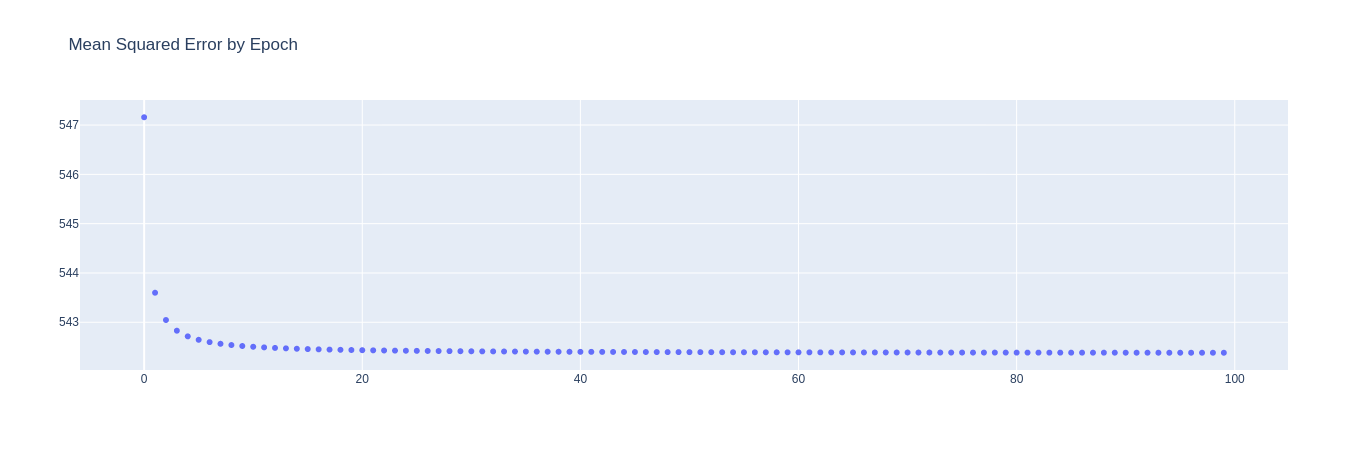

In [65]:
from plotly import graph_objects as go

fig = go.Figure(
    data=go.Scatter(x=hist.epoch, y=hist.history["mean_squared_error"], mode="markers"),
)
fig.update_layout(
    title="Mean Squared Error by Epoch",
)
fig.show()

In [66]:
scores = model.evaluate(X_test, y_test)
scores

102/102 [==============================] - 0s 1ms/sample - loss: 570.7129 - mean_squared_error: 570.7128


[570.7128654928769, 570.7128]

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [67]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
X_train.shape

(60000, 28, 28)

In [69]:
import numpy as np

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [70]:
import keras

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [72]:
y_train.shape

(60000, 10)

In [75]:
mnist_model = Sequential()
mnist_model.add(
    Dense(32, input_shape=(X_train.shape[1],), activation="relu"),
)
mnist_model.add(
    Dense(32, activation="relu"),
)
mnist_model.add(
    Dense(32, activation="relu"),
)
mnist_model.add(
    Dense(32, activation="relu"),
)
mnist_model.add(
    Dense(32, activation="relu"),
)
mnist_model.add(
    Dense(y_train.shape[1], activation="softmax"),
)

# compile
mnist_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mnist_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
__________________________________________________

In [77]:
hist = mnist_model.fit(X_train, y_train, batch_size=32, epochs=100)


Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5711 - accuracy: 0.7853
Epoch 2/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5147 - accuracy: 0.8123
Epoch 3/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4791 - accuracy: 0.8283
Epoch 4/100
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4578 - accuracy: 0.8358
Epoch 5/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4425 - accuracy: 0.8412
Epoch 6/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4307 - accuracy: 0.8454
Epoch 7/100
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4231 - accuracy: 0.8490
Epoch 8/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4125 - accuracy: 0.8515
Epoch 9/100
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4025 - accuracy: 0.8568
Epoch

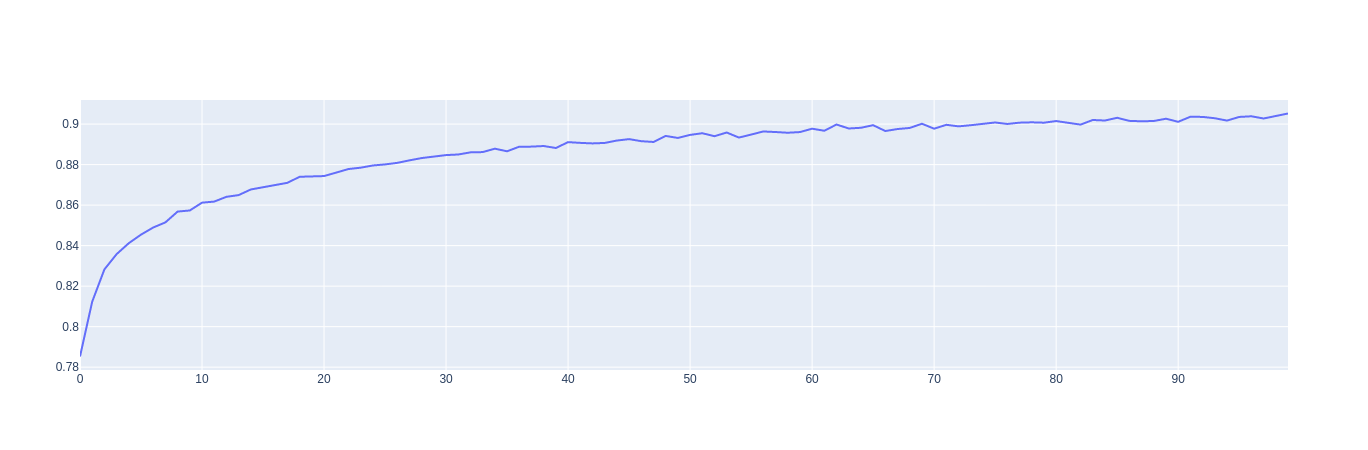

In [78]:
fig = go.Figure(
    data=go.Scatter(x=hist.epoch, y=hist.history["accuracy"])
)
fig.show()

In [79]:
scores = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.4804 - accuracy: 0.8613


In [80]:
scores

[0.480407804954052, 0.8613]

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



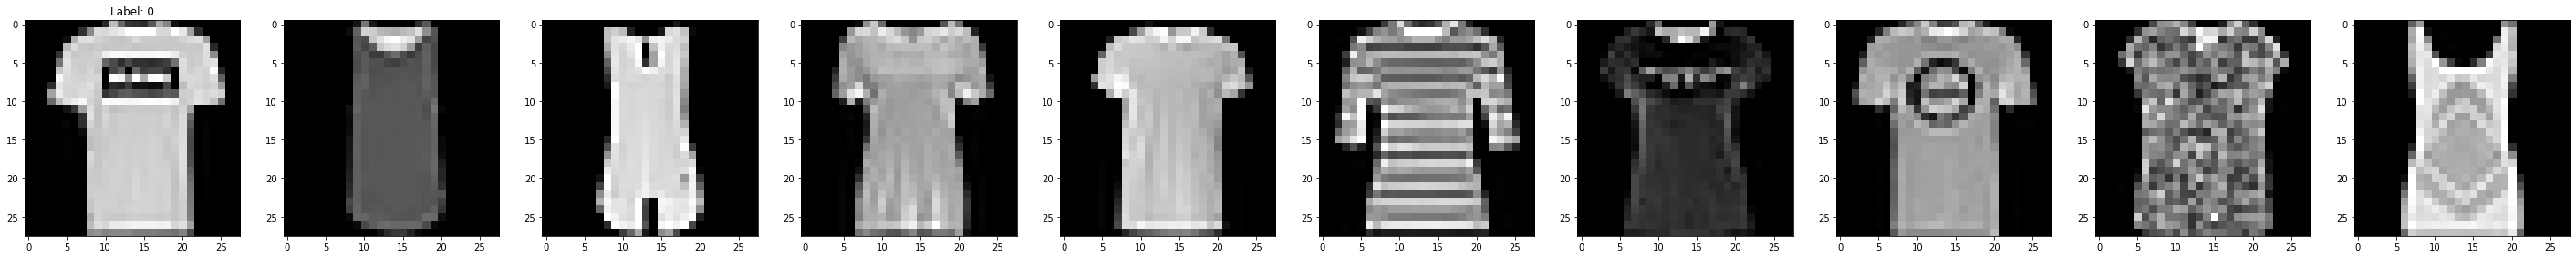

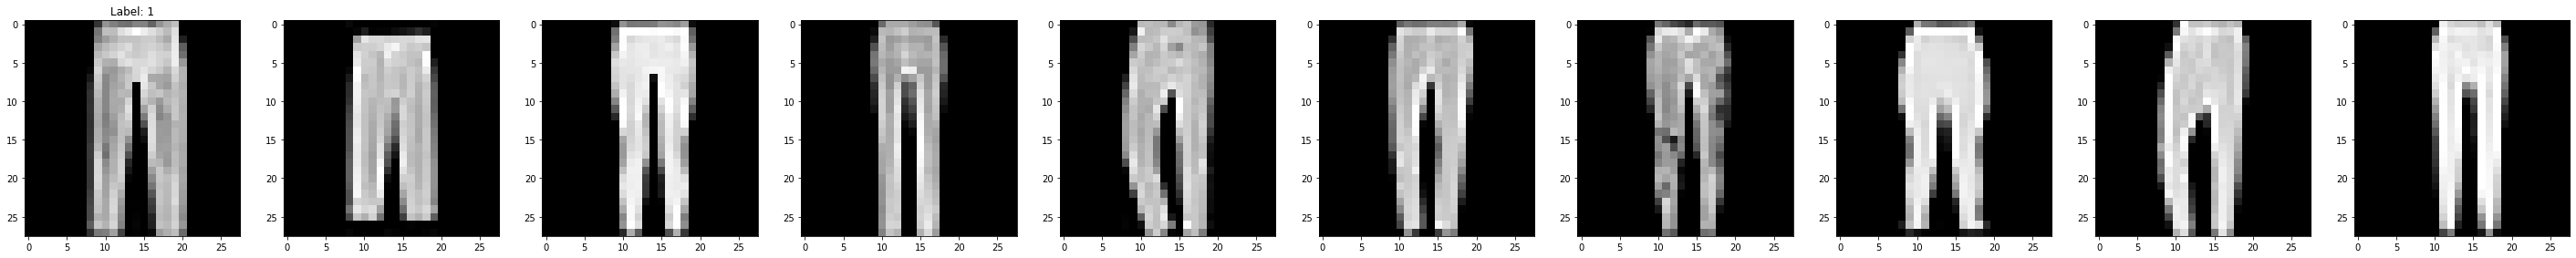

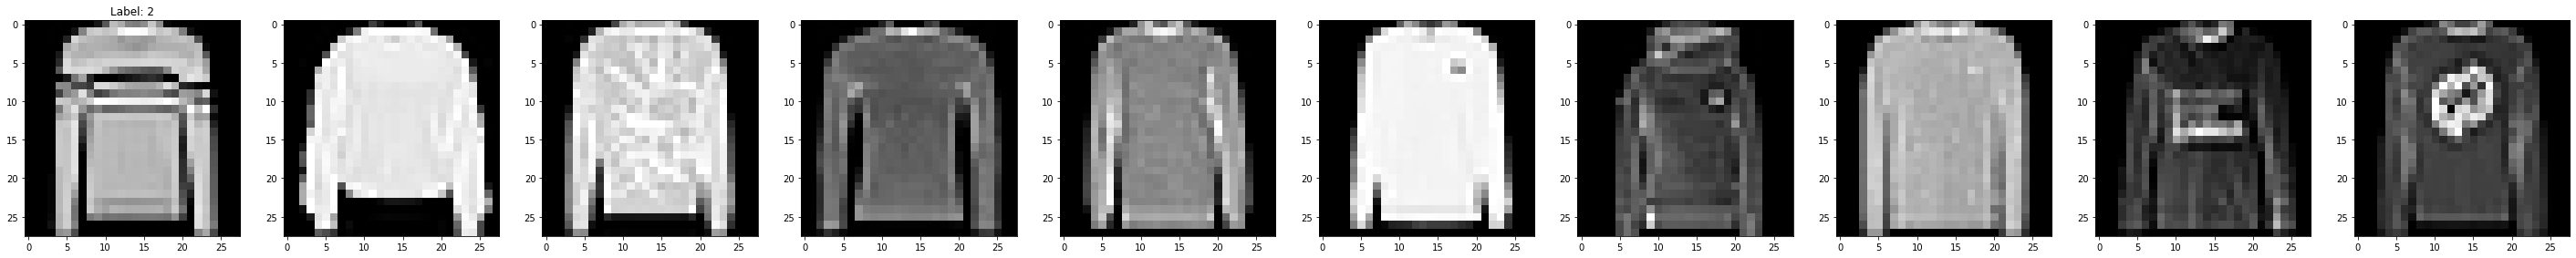

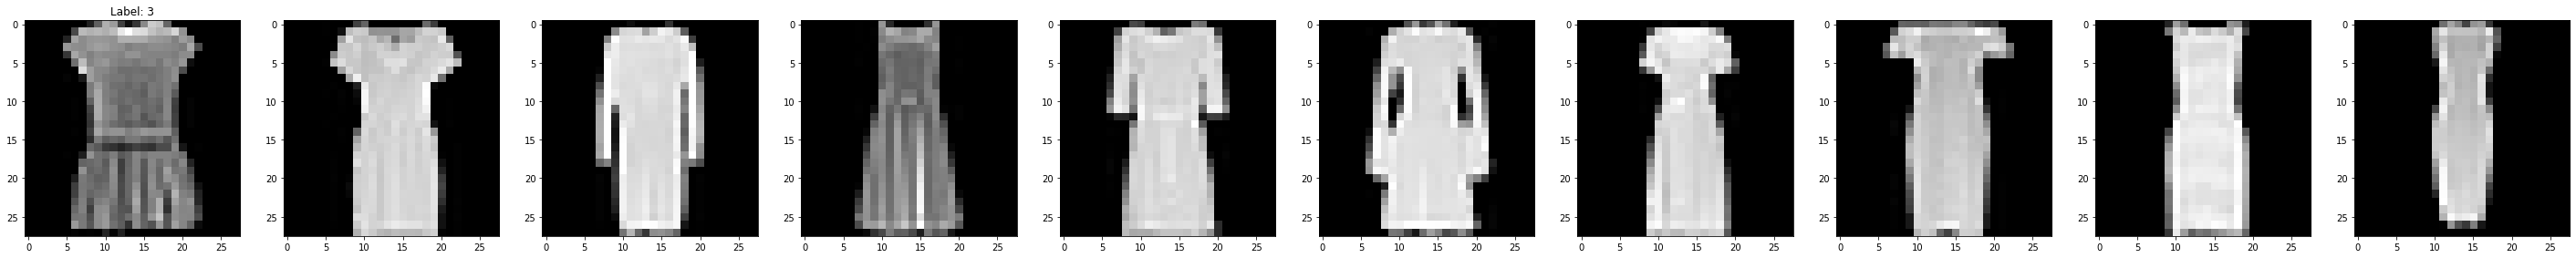

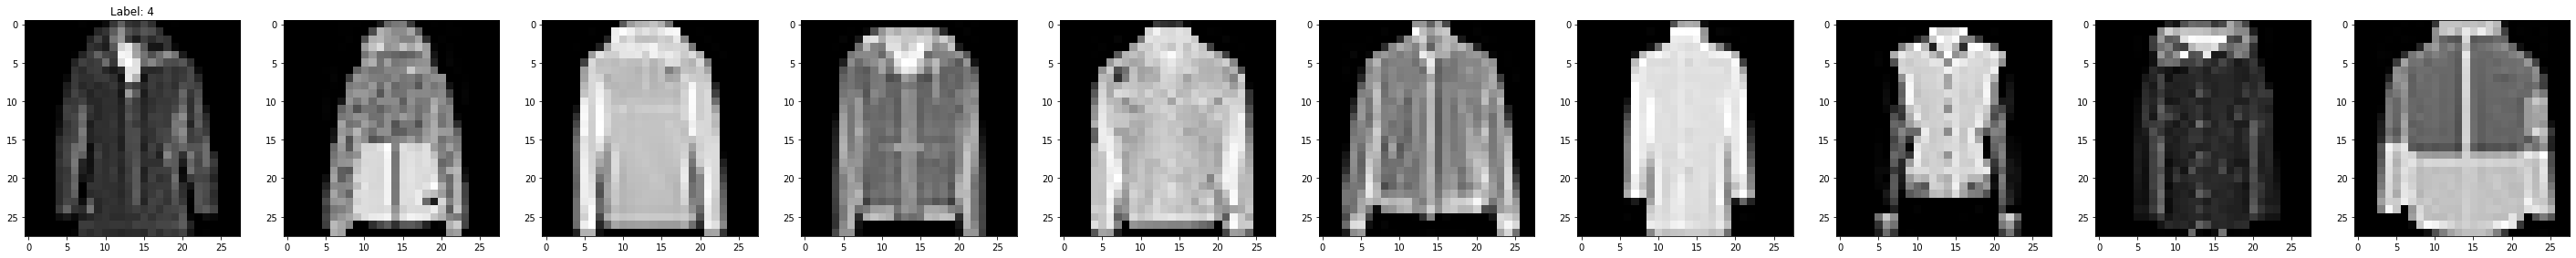

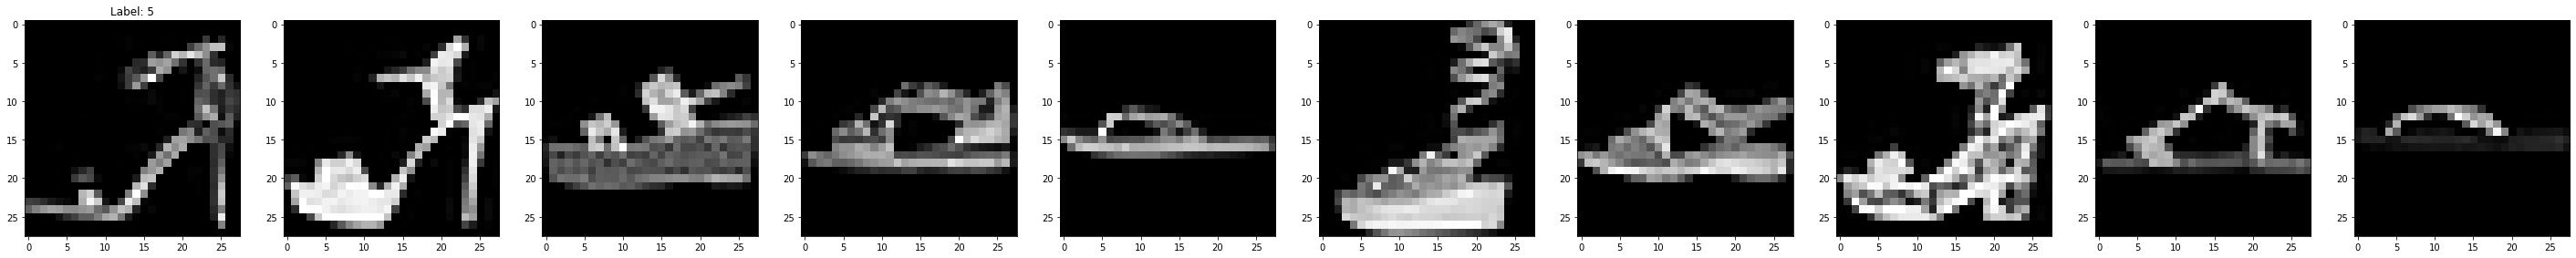

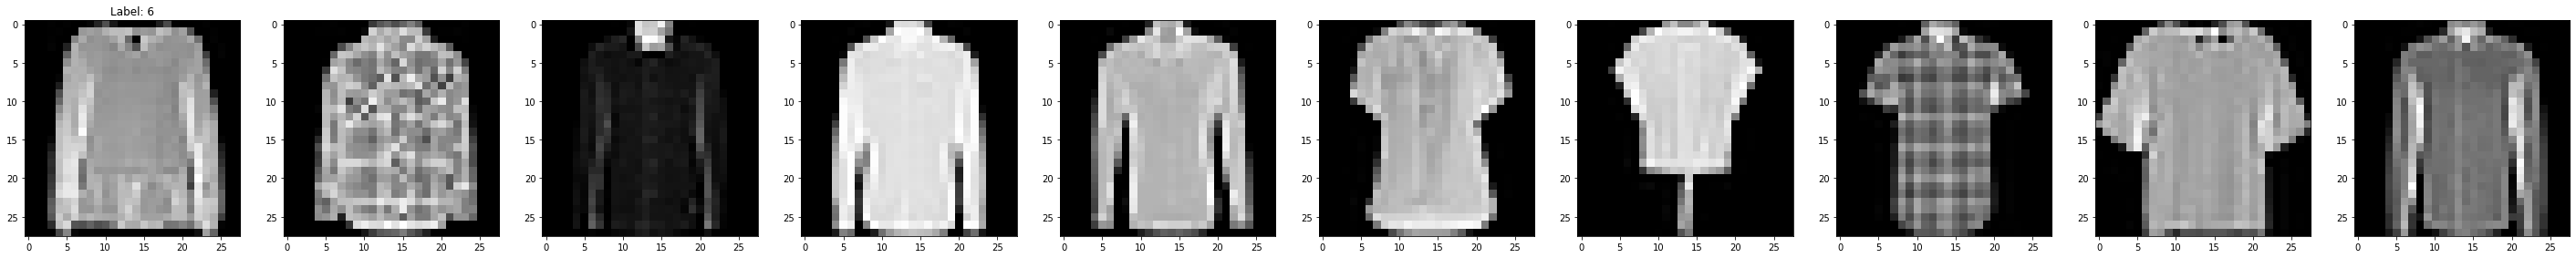

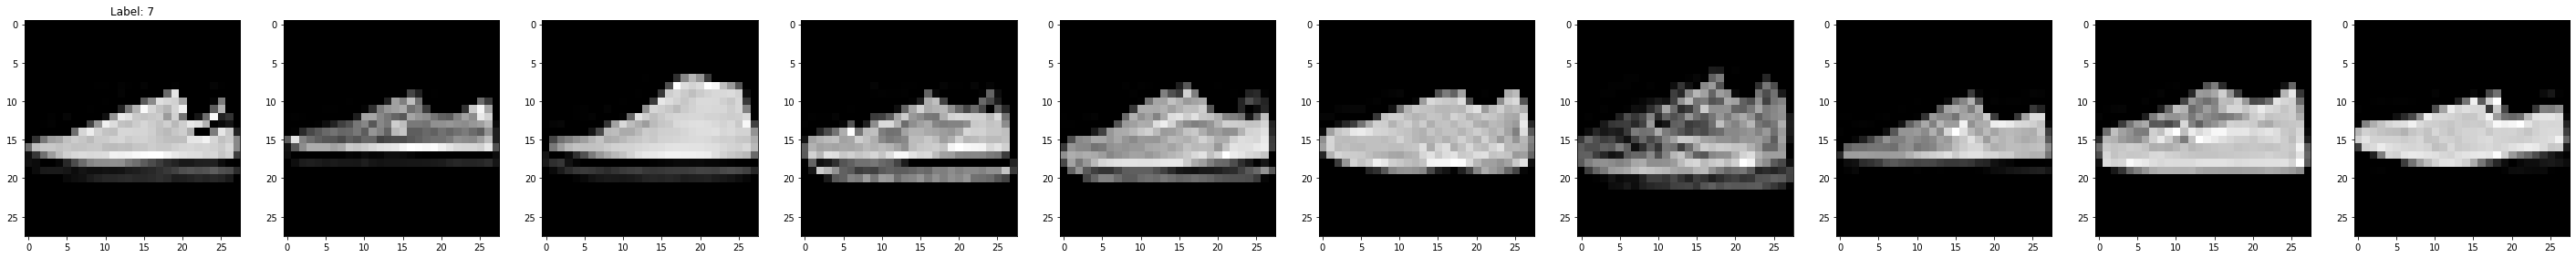

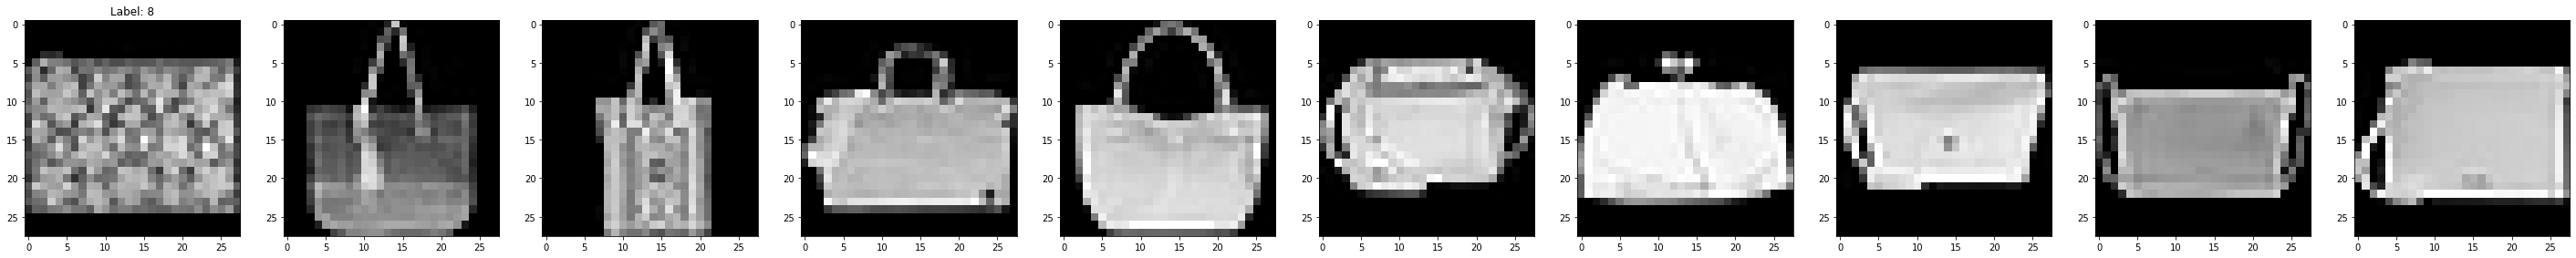

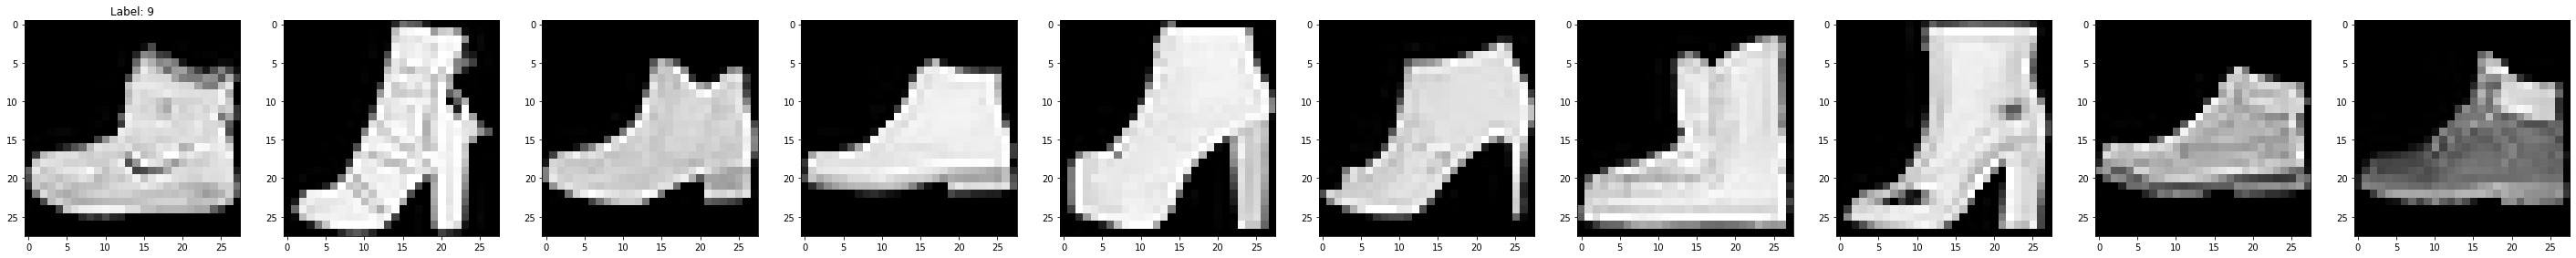

In [91]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train[0]

from matplotlib import pyplot as plt

for n in range(10):
    samples = [sample for sample, label in zip(X_train, y_train) if label == n][:10]
    
    fig, axes = plt.subplots(ncols=10, figsize=(50, 5))
    for sample, ax in zip(samples, axes):
        ax.imshow(sample, "gray")
    axes[0].set_title(f"Label: {n}")
    fig.show()

6 0
3 0
4 2
4 2
4 2
2 3
7 5
9 5
2 6
2 6
4 6
4 6
2 6
9 7


/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



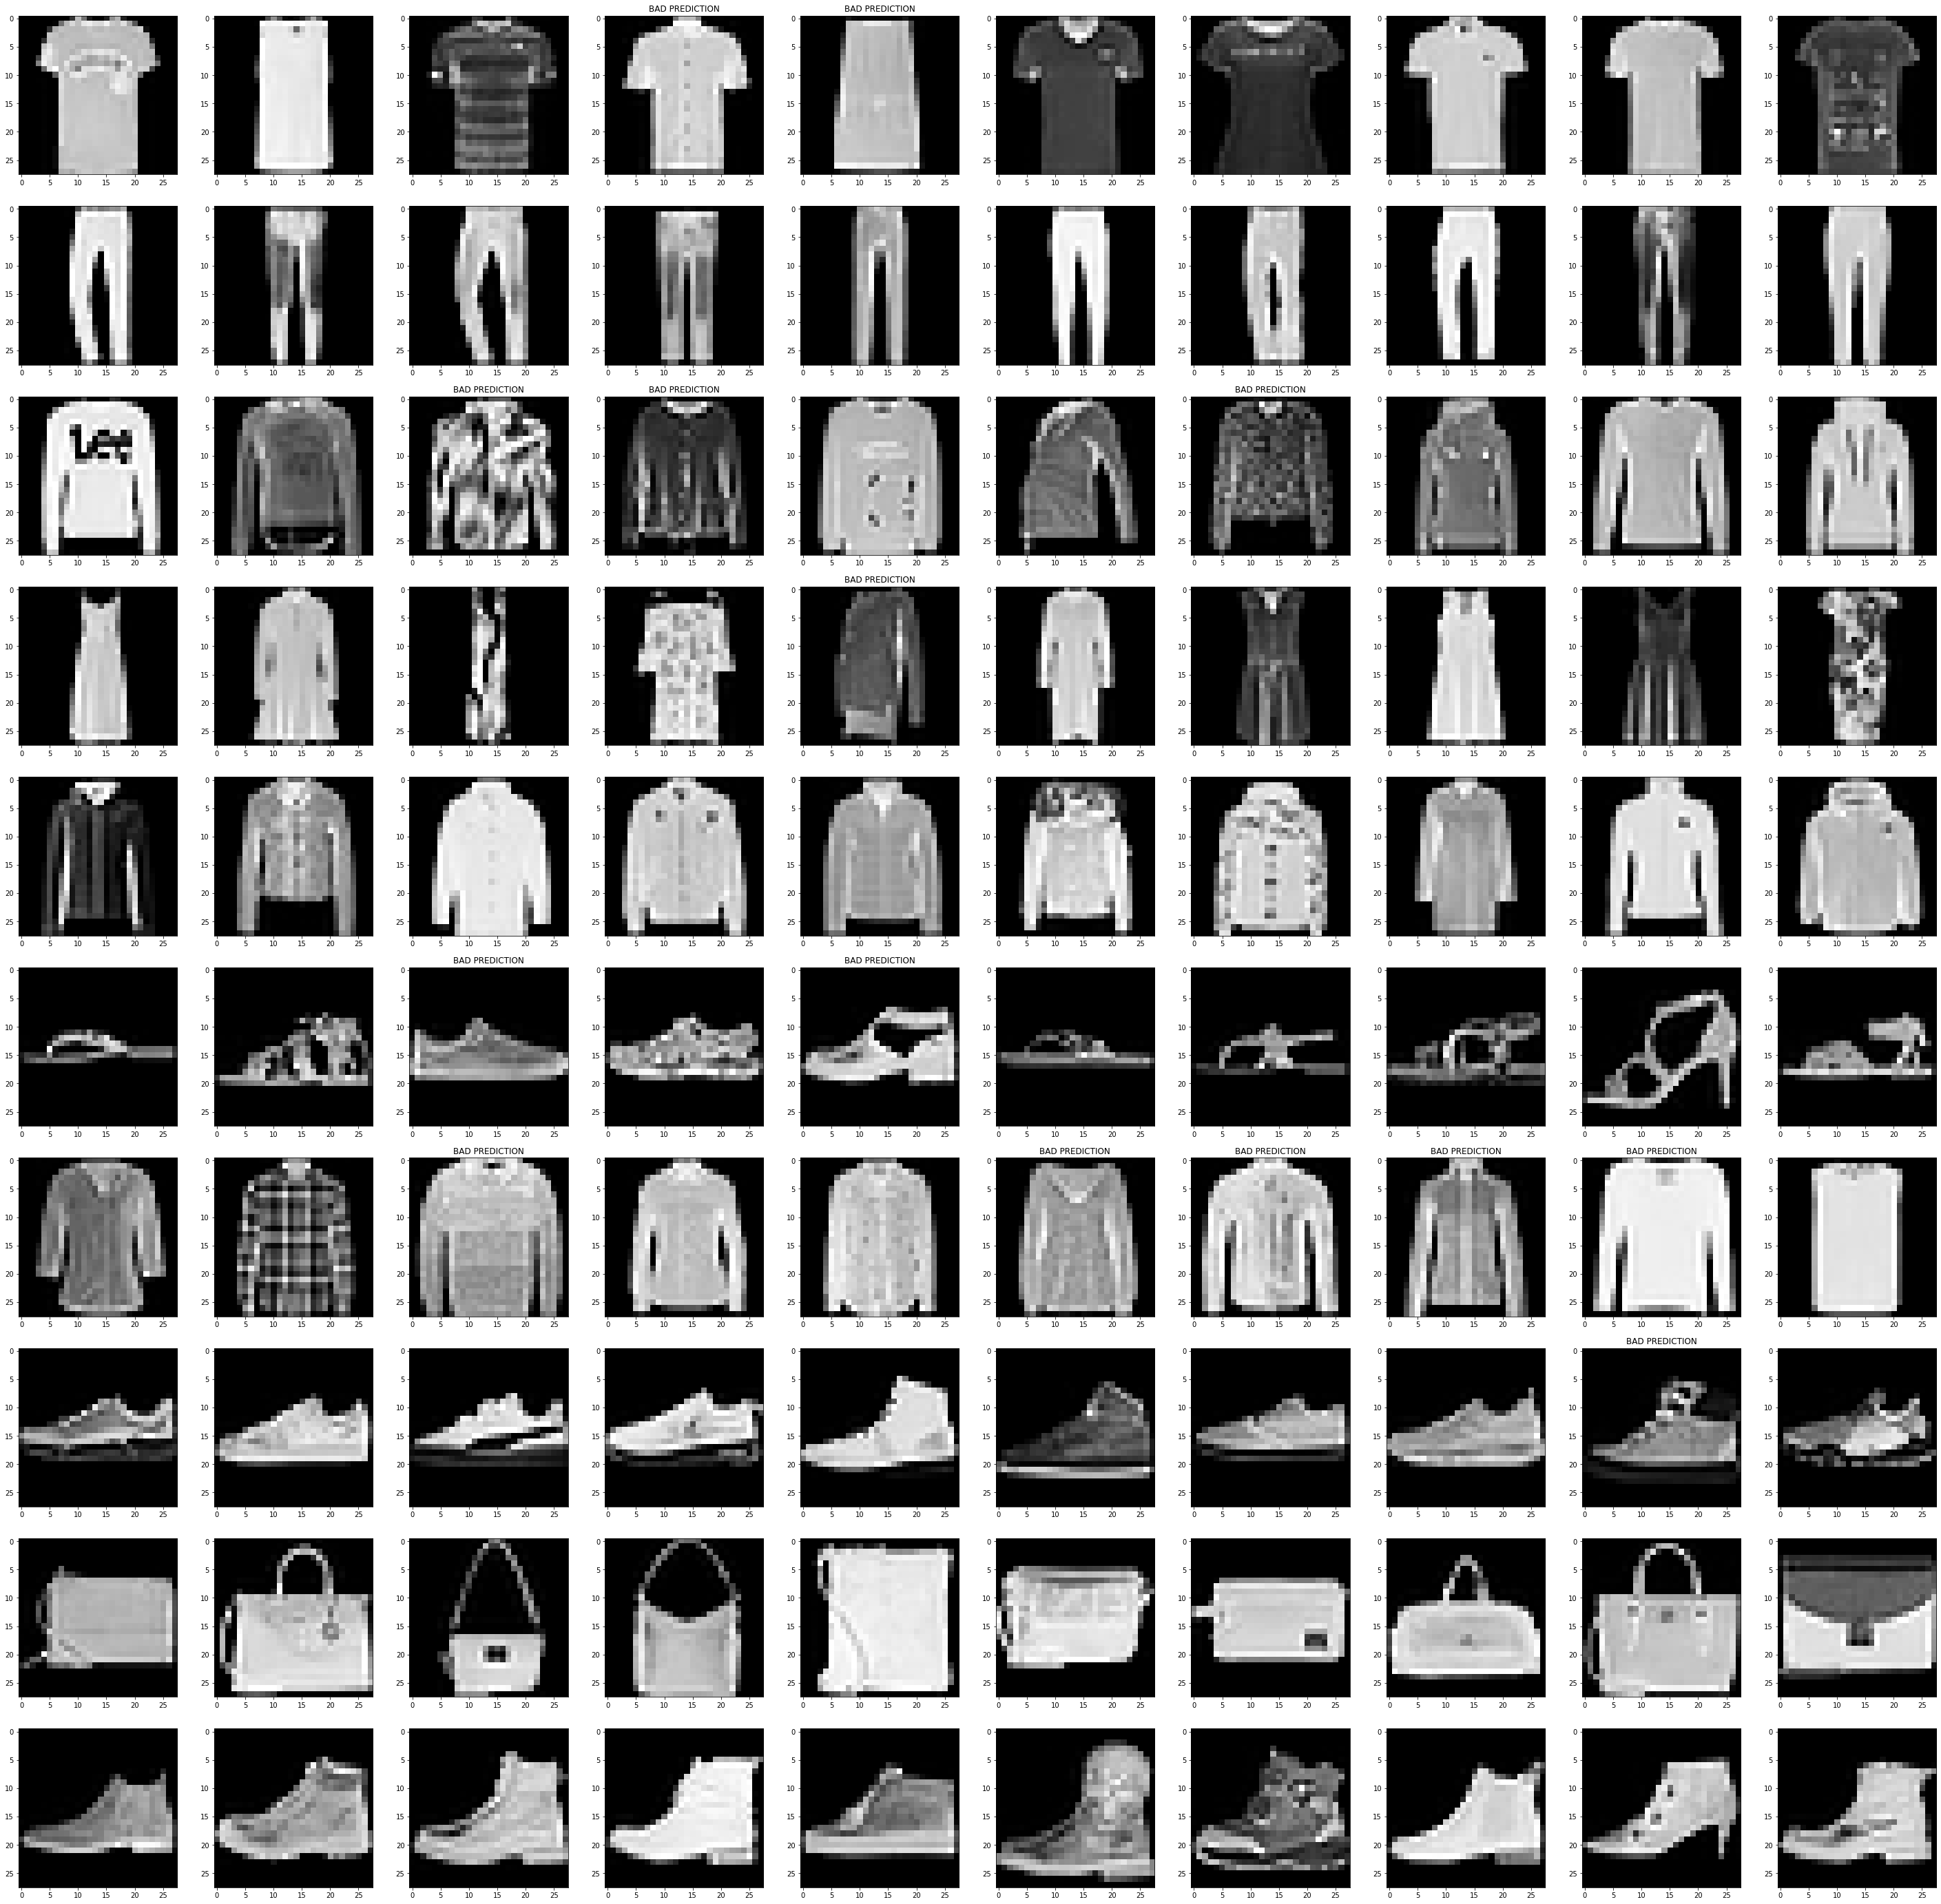

In [114]:
pred_test = mnist_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
preds = []
for ohe in pred_test:
    _, label = max(
        [(score, ix) for ix, score in enumerate(ohe)]
    )
    preds.append(label)

fig, axes = plt.subplots(ncols=10, nrows=10, figsize=(50, 50))
for n, axes_row in zip(range(10), axes):
    samples = [(sample, actual_label, pred_label) for sample, actual_label, pred_label in zip(X_test, y_test, preds) if pred_label == n][:10]
    
    for (sample, actual_label, pred_label,), ax in zip(samples, axes_row):
        if actual_label != pred_label:
            print(actual_label, pred_label)
            ax.set_title("BAD PREDICTION")
        ax.imshow(sample, "gray")

fig.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.